In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

warnings.filterwarnings('ignore')

In [2]:
data_1 = pd.read_csv('Dataset_part_PP2.csv', encoding="utf-8")
data_2 = pd.read_csv('DatasetSinRellenar.csv', encoding="utf-8")




print(data_1.info())
print(data_2.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       300 non-null    object
 1   Clean_Resume   300 non-null    object
 2   Common Skills  300 non-null    object
dtypes: object(3)
memory usage: 7.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       952 non-null    object
 1   Clean_Resume   952 non-null    object
 2   Common Skills  952 non-null    object
dtypes: object(3)
memory usage: 22.4+ KB
None


In [3]:
# Verifica si hay valores nulos en el dataset
nulos_en_dataset = data_1.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = data_1.isnull().sum()
print(nulos_por_columna)

False
Category         0
Clean_Resume     0
Common Skills    0
dtype: int64


In [4]:
print(data_2.shape)
print(data_2.columns)
print(data_2.Category.value_counts())


(952, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               140
Python Developer             140
Testing                      140
DevOps Engineer              110
Web Designing                 90
Blockchain                    80
Data Science                  80
Database                      66
DotNet Developer              56
Network Security Engineer     50
Name: count, dtype: int64


In [5]:

print(data_1.shape)
print(data_1.columns)
print(data_1.Category.value_counts())


(300, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Network Security Engineer    50
DotNet Developer             50
Web Designing                50
Database                     50
Blockchain                   50
Data Science                 50
Name: count, dtype: int64


In [6]:
def join_dataset():

    rows_to_add = data_1.shape[0] - data_2.shape[0]

    additional_rows = pd.DataFrame(index=range(rows_to_add), columns=data_2.columns)

    df2_aligned = pd.concat([additional_rows, data_2], ignore_index=True)

    result = pd.concat([data_1, df2_aligned], axis=0)

    result.drop(result.columns[result.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    
    return result



In [7]:

result = join_dataset()


# Verifica si hay valores nulos en el dataset
nulos_en_dataset = result.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = result.isnull().sum()
print(nulos_por_columna)

False
Category         0
Clean_Resume     0
Common Skills    0
dtype: int64


In [8]:
print(result.shape)
print(result.columns)
print(result.Category.value_counts())


(1252, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Web Designing                140
Java Developer               140
Python Developer             140
Testing                      140
Blockchain                   130
Data Science                 130
Database                     116
DevOps Engineer              110
DotNet Developer             106
Network Security Engineer    100
Name: count, dtype: int64


In [9]:
result['Category'] = result['Category'].str.strip()

In [10]:
result["Category"].unique()

array(['Network Security Engineer', 'DotNet Developer', 'Web Designing',
       'Database', 'Blockchain', 'Data Science', 'DevOps Engineer',
       'Java Developer', 'Python Developer', 'Testing'], dtype=object)

In [11]:
#reducir las etiquetas a 1200
def sample_n(df, n=140):
    return df.sample(min(len(df), n))

df = result.groupby('Category').apply(sample_n).reset_index(drop=True)

In [12]:
print(df.shape)
print(df.columns)
print(df.Category.value_counts())

(1252, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               140
Python Developer             140
Testing                      140
Web Designing                140
Blockchain                   130
Data Science                 130
Database                     116
DevOps Engineer              110
DotNet Developer             106
Network Security Engineer    100
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

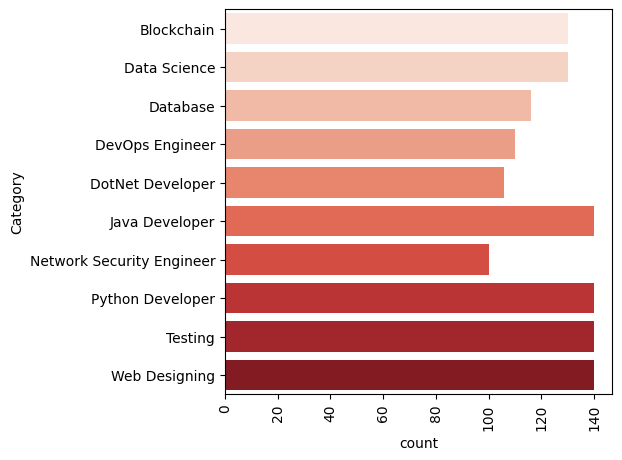

In [13]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [14]:
df.to_csv('DatasetRelleno.csv', index=False)
